In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['professionals.csv', 'tag_users.csv', 'students.csv', 'tag_questions.csv', 'groups.csv', 'emails.csv', 'group_memberships.csv', 'answers.csv', 'comments.csv', 'matches.csv', 'tags.csv', 'questions.csv', 'school_memberships.csv']


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
answers = pd.read_csv('../input/answers.csv',parse_dates=['answers_date_added'])
questions = pd.read_csv('../input/questions.csv',parse_dates=['questions_date_added'])
students = pd.read_csv("../input/students.csv")
students['students_date_joined'] = pd.to_datetime(students['students_date_joined'])
professionals = pd.read_csv('../input/professionals.csv',parse_dates=['professionals_date_joined'])
questions = pd.read_csv('../input/questions.csv',parse_dates=['questions_date_added'])
tag_questions = pd.read_csv('../input/tag_questions.csv')
emails = pd.read_csv('../input/emails.csv',sep=',')

In [ ]:
print(os.listdir("../input"))

In [4]:
students = pd.read_csv("../input/students.csv")

In [ ]:
students.info()

In [ ]:
#the number of students who have a missing value 
students.isnull().any(axis=1).sum()

In [ ]:
students.shape

In [ ]:
students.head()

In [ ]:
student_temp = pd.to_datetime(students['students_date_joined'])

In [ ]:
student_temp.head()

In [ ]:
students['students_date_joined'] = pd.to_datetime(students['students_date_joined'])

In [ ]:
students[pd.notnull(students['students_location'])].shape

In [ ]:
students_locations = students['students_location'].value_counts().sort_values(ascending=True).tail(20)

In [ ]:
type(students_locations)

In [ ]:
students_locations.plot(kind='barh',figsize=(10,8),color='b',width=1)
plt.title('Number of students by location',fontsize=20)
plt.xlabel('Number of students',fontsize=12)
plt.show()

In [ ]:
# students who do not have a location 
students.students_location.isna().sum()

In [ ]:
professionals = pd.read_csv('../input/professionals.csv',parse_dates=['professionals_date_joined'])

In [ ]:
professionals.shape

In [ ]:
professionals.info()

In [ ]:
professionals.head()

In [ ]:
professionals_location = professionals.professionals_location.value_counts().sort_values(ascending=True).tail(20)

In [ ]:
#draw a horizontal bar graph 
professionals_location.plot(kind='barh',color='b',width=1,figsize=(10,8))
plt.title('Number of professionals by location',fontsize=20)
plt.xlabel('Number of professionals',fontsize=12)
plt.show()

In [ ]:
print('Total number of professionals:',professionals.shape[0])
print('Number of professionals without location:',professionals.professionals_location.isna().sum())

In [ ]:
professionals_industry = professionals.professionals_industry.value_counts().sort_values(ascending=True).tail(30)

In [ ]:
professionals_industry.plot(kind='barh',color='b',figsize=(10,8),width=1)
plt.title('Number of professionals by industry',fontsize=12)
plt.xlabel('Number of professionals',fontsize=10)
plt.show()

In [ ]:
print('The total number of professionals',professionals.shape[0])
print('The total number of professionals without industry',professionals.professionals_industry.isna().sum())

In [ ]:
questions = pd.read_csv('../input/questions.csv',parse_dates=['questions_date_added'])

In [ ]:
questions.shape

In [ ]:
questions.questions_author_id.value_counts().count()

In [ ]:
print('Authors ',questions.questions_author_id.value_counts().count())
print('Unique authors ',questions.questions_author_id.nunique())

In [ ]:
answers = pd.read_csv('../input/answers.csv',parse_dates=['answers_date_added'])

In [ ]:
print('There are ', answers.answers_author_id.nunique(),' unique authors on career village')
print('The number of registered professionals is ',professionals.shape[0])

In [ ]:
tag_questions = pd.read_csv('../input/tag_questions.csv')

In [ ]:
tag_questions.head()

In [ ]:
tags = pd.read_csv('../input/tags.csv')

In [ ]:
print('The number of tags:', tags.shape[0]) 
print('The number of unique tags: ',tags.tags_tag_id.nunique())

In [ ]:
# There is one NaN tag
tags[tags.tags_tag_name.isna()]

In [ ]:
tag_questions_tags = pd.merge(left=tag_questions,right=tags,how='inner',left_on='tag_questions_tag_id'
                              ,right_on='tags_tag_id')

In [ ]:
tag_questions_tags.info()

In [ ]:
top_tags_20 = tag_questions_tags.tags_tag_name.value_counts().sort_values(ascending=True).tail(20)

In [ ]:
top_tags_20.plot(kind='barh',color='b',figsize=(10,8),width=1)
plt.title('Top 20 tags',fontsize=12)
plt.xlabel('Number of questions',fontsize=10)
plt.show()

In [ ]:
tag_questions_templ = tag_questions.merge(right=tags,how='left',left_on='tag_questions_tag_id'
                                         ,right_on='tags_tag_id'
                                        )

In [ ]:
tag_questions_templ.info()

In [ ]:
print('The number of questions with tags:',tag_questions.shape[0])
print('The number of questions with tags after the left join:',tag_questions_templ.shape[0])

In [ ]:
tag_questions_tempi = tag_questions.merge(right=tags,how='inner',left_on='tag_questions_tag_id'
                                          ,right_on='tags_tag_id'
                                         )

In [ ]:
print('The number of questions with tags:',tag_questions.shape[0])
print('The number of questions with tags after the inner join:',tag_questions_tempi.shape[0])

In [ ]:
#number of questions which are not answered 
questions.shape

In [ ]:
answers.shape

In [ ]:
questions_answers_lo =  questions.merge(right=answers,how='left',left_on='questions_id',right_on='answers_question_id')

In [ ]:
questions_answers_lo.shape

In [ ]:
questions.shape

In [ ]:
questions_answers_lo.head()

In [ ]:
questions_answers_lo[pd.isnull(questions_answers_lo.answers_id)].head()

In [ ]:
answers[answers.answers_question_id == 'dab7b240dc394d30a54dd0c5862d5fe3']

In [ ]:
questions[questions.questions_id == 'dab7b240dc394d30a54dd0c5862d5fe3']

In [ ]:
questions_answers_lo[pd.isnull(questions_answers_lo.answers_id)].head()

In [ ]:
questions_unanswered = questions_answers_lo.loc[pd.isnull(questions_answers_lo.answers_id),questions.columns.tolist()]


In [ ]:
questions_unanswered_tag_questions = questions_unanswered.merge(right=tag_questions,how='inner',left_on='questions_id'
                                                                ,right_on='tag_questions_question_id')

In [ ]:
questions_unanswered_tag_questions.head()

In [ ]:
questions_unanswered.shape

In [ ]:
#each question is having atleast 3 tags

In [ ]:
questions_unanswered_tag_questions_tags = questions_unanswered_tag_questions.merge(right=tags,
                                                                                  how='inner',
                                                                                   left_on = 'tag_questions_tag_id',
                                                                                   right_on = 'tags_tag_id'
                                                                                  )

In [ ]:
uq_tags = questions_unanswered_tag_questions_tags.tags_tag_name.value_counts().sort_values().tail(30)

In [ ]:
uq_tags.plot(kind='barh',figsize=(10,8),color='b')
plt.title('Top 30 tags')
plt.xlabel('Number of unanswered questions')
plt.show()

In [ ]:
#time distribution of questions 
df_questions_copy = questions.set_index(keys='questions_date_added')

In [ ]:
#df_questions_copy.index.year.tolist()

In [ ]:
df_questions_yearly_dist = df_questions_copy['questions_id'].groupby(df_questions_copy.index.year.tolist()).count()

In [ ]:
df_questions_monthly_dist = df_questions_copy['questions_id'].groupby(df_questions_copy.index.month.tolist()).count()

In [ ]:
df_questions_monthly_dist

In [ ]:
df_questions_copy['month_year'] = df_questions_copy.index.to_period(freq='M').astype('str')

In [ ]:
df_questions_copy.head()

In [ ]:
df_questions_monthly_dist = df_questions_copy[['month_year','questions_id']].groupby('month_year').count()

In [ ]:
#df_questions_copy[['month_year','questions_id']].groupby('month_year').count()
df_questions_monthly_dist

In [ ]:
df_questions_monthly_dist.plot(kind='bar',figsize=(15,10))
plt.title('Monthly Distribution of questions')
plt.xlabel('Number of questions')
plt.show()

In [ ]:
questions['questions_date_added'].map(lambda x: x.year).head()

In [ ]:
questions_dist = questions.copy()

In [ ]:
questions_dist['year'] = questions_dist['questions_date_added'].dt.year

In [ ]:
questions_dist['month'] = questions_dist['questions_date_added'].dt.month

In [ ]:
questions_dist.head()

In [ ]:
questions_dist_ym = questions_dist[['questions_id','year','month']].groupby(by=['year','month']).count()

In [ ]:
questions_dist_ym.plot(kind='bar',figsize=(15,10),color='b')
plt.title('Questions timeline')
plt.xlabel('month-year')
plt.show()

In [ ]:
professionals.dtypes

In [ ]:
#time distribution of the professionals 
df_professionals = professionals.copy()

In [ ]:
df_professionals['year']= df_professionals['professionals_date_joined'].dt.year

In [ ]:
df_professionals['month'] = df_professionals['professionals_date_joined'].dt.month

In [ ]:
df_professionals[['professionals_id','year']].groupby(by=['year']).count().plot(kind='bar',color='b',figsize=(10,8))
plt.title('Professionals Joined')
plt.show()

In [ ]:
df_professionals[['professionals_id','month']].groupby(by='month').count().plot(kind='bar',figsize=(10,8),color='b')
plt.title('Profesionals joined by month')
plt.xlabel('Month')
plt.show()

In [ ]:
df_professionals[['professionals_id','year','month']].groupby(by=['year','month']).count().plot(kind='bar',color='b',figsize=(15,8))
plt.title('Professionals joined by Year-Month')
plt.xlabel('Year-Month')
plt.show()

In [ ]:
df_prof = professionals.copy()

In [ ]:
df_prof.set_index(keys=df_prof.professionals_date_joined,inplace=True)

In [ ]:
df_prof['Year'] = df_prof.index.year

In [ ]:
df_prof['Month'] = df_prof.index.month

In [ ]:
df_prof['year_month'] = df_prof.index.to_period('M').astype('str')

In [ ]:
df_prof.head()

In [ ]:
os.listdir('../input')

In [ ]:
emails = pd.read_csv('../input/emails.csv',sep=',')

In [ ]:
emails.emails_frequency_level.value_counts().sort_values(ascending=True)

In [ ]:
emails.info()

In [ ]:
emails.shape

In [ ]:
len(emails.emails_id.value_counts())

In [ ]:
emails[emails['emails_recipient_id'] == '00009a0f9bda43eba47104e9ac62aff5'].sort_values(by='emails_date_sent')

In [ ]:
matches = pd.read_csv('../input/matches.csv')

In [ ]:
matches.info()

In [ ]:
emails.head()

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sns.countplot(x='emails_frequency_level',data=emails,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
ax.set_xlabel('Email notification Frequency')
ax.set_title('Subscribers count by frequency')
ax.axhline(0, color="k", clip_on=False)

In [ ]:
#number of questions per email

In [ ]:
matches.groupby(by='matches_email_id').count()

In [ ]:
questions_by_year = questions_dist.groupby(by='year').count()['questions_id']

In [ ]:
questions_by_year.head()

In [ ]:
answers_dist = answers.copy()

In [ ]:
answers_dist['year'] = answers_dist['answers_date_added'].dt.year

In [ ]:
answers_dist.head()

In [ ]:
answers_by_year = answers_dist.groupby(by='year').count()['answers_id']

In [ ]:
answers_by_year

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(16,6))
ax1 = sns.lineplot(x=questions_by_year.index,y=questions_by_year.values,color='orange')
ax2 = sns.lineplot(x=answers_by_year.index,y=answers_by_year.values,color='blue',)
ax1.set(xlabel = 'Year',ylabel='# of questions/answers')
plt.legend(['Questions asked','Questions answered'], loc=0)
plt.show()

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(questions_by_year.values,color='orange')
plt.plot(answers_by_year.values,color='blue')
plt.legend(['Questions asked','Questions Answered'])
plt.xticks(range(len(questions_by_year.index.values)),questions_by_year.index.values)
plt.show()

In [ ]:
questions_by_year.index

In [ ]:
range(4,8)

In [ ]:
for i in range(3,11,2):
    print(i)
print('*'*7,'o','*'*7)    
for i in range(4,8):
    print(i)
print('*'*7,'o','*'*7)    
for i in range(0,3):
    print(i)

In [ ]:
#time taken to answer the questions 
questions.head() 

In [ ]:
answers.head()

In [ ]:
questions_answers = questions.merge(right=answers,how='inner',left_on='questions_id'
                                    ,right_on='answers_question_id')

In [ ]:
questions_answers['time']= questions_answers['questions_date_added'] - questions_answers['answers_date_added']

In [ ]:
questions_answers['time']= questions_answers['time'].map(lambda x: x * -1)

In [ ]:
questions_answers['time'] = questions_answers['answers_date_added'] - questions_answers['questions_date_added']

In [ ]:
questions_answers['time'].head()

In [ ]:
questions_answers['time_in_days'] = questions_answers['time'].dt.days

In [ ]:
questions_answers.shape

In [ ]:
#create a histogram 
plt.figure(figsize=(16,10))
plt.hist(x=questions_answers['time_in_days'].values,bins=100,histtype='bar')
plt.xlabel('Days')
plt.ylabel('# of questions')
plt.title('Time taken to answer (in days)')
plt.show()

In [ ]:
questions_answers.info()

In [ ]:
questions_answers['questions_title_length'] = questions_answers['questions_title'].map(len)

In [ ]:
questions_answers[pd.isnull(questions_answers['answers_body'])]

In [ ]:
questions_answers['answers_body'].fillna('0',inplace = True)

In [ ]:
questions_answers['answers_body_length'] = questions_answers['answers_body'].apply(len)

In [ ]:
questions_answers[['questions_title_length','answers_body_length']].head()

In [ ]:
plt.figure(figsize=(16,10))
plt.hist(x=questions_answers['questions_title_length'],bins=100,color='blue')
plt.xlabel('Title length')
plt.ylabel('# of questions')
plt.title('Distribution of the questions length')
plt.show()

In [ ]:
questions_answers['questions_body_length'] = questions_answers['questions_body'].apply(len)

In [ ]:
questions_answers['questions_body_length'].head()

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(x=questions_answers[questions_answers['questions_body_length']<1000]['questions_body_length'], bins=50, color='blue')
plt.title('Distribution of body length for questions ')
plt.xlabel('Questions Body Length')
plt.ylabel('# of questions')
plt.show()

In [ ]:
questions_answers.info()

In [ ]:
#questions_answers['answers_body_length'] = questions_answers['answers_body'].map(len)
# there is NaN in the answers_body 
questions_answers[pd.isnull(questions_answers.answers_body) ]

In [ ]:
# fillna with 0 
questions_answers['answers_body'].fillna(0,inplace=True)

In [ ]:
questions_answers[questions_answers.answers_body == 0]['answers_body'] 

In [ ]:
questions_answers.loc[48625,['answers_body']] = 'missing'

In [ ]:
questions_answers['answers_body_length'] = questions_answers['answers_body'].map(len)

In [ ]:
questions_answers['answers_body_length'].head()

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.distplot(a=questions_answers[questions_answers['answers_body_length']<1000]['answers_body_length'],bins=50,kde=False,color='blue')
ax.set(xlabel = '# of answers',ylabel='Answers body length')
plt.title('Distribution of answers body')
plt.show()

In [ ]:
questions_answers.info()

In [ ]:
questions_answers[['questions_title_length','questions_body_length','time_in_days']].head()

In [ ]:
questions_answers[['questions_title_length','questions_body_length','time_in_days']].corr()

In [ ]:
# scatter plot of questions_body_length versus time to answer 
#fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.jointplot(x='questions_body_length'
                   ,y='time_in_days'
                   ,data=questions_answers
                   ,kind='scatter'
              )
plt.title('Scatter plot of body length versus time in days')
#plt.xlabel('Questions body length')
#plt.ylabel('Time in days')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(x='questions_body_length'
            ,y='time_in_days'
            ,data=questions_answers
            ,alpha = 0.5
           )
plt.title('Scatter plot of questions body length vs time taken')
plt.xlabel('Questions body length')
plt.ylabel('Time taken in days')
plt.show()

In [ ]:
answers.shape

In [ ]:
questions.shape

In [ ]:
questions_answers.shape

In [ ]:
questions_answers.questions_id.nunique()

In [ ]:
#distribution of length for answer bodies 
questions_answers.info()

In [ ]:
plt.figure(figsize=(12,8))
plt.hist(questions_answers['answers_body_length'].values
        ,histtype='bar'
        ,bins=100
        ,color='blue'
        )
plt.title('Distribution of answers body length')
plt.xlabel('Answers body length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#number of answers for question 
number_answers_for_question = answers['answers_question_id'].value_counts(ascending=True).values
plt.figure(figsize=(12,8))
plt.hist(x=number_answers_for_question
         ,histtype='bar'
         ,color='blue'
         ,bins = 60
        )
plt.xlabel('Number of answers for a question')
plt.ylabel('Frquency')
plt.title('Histogram for number of answers')
plt.show()

In [ ]:
os.listdir('../input')

In [6]:
comments = pd.read_csv('../input/comments.csv')

In [7]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14966 entries, 0 to 14965
Data columns (total 5 columns):
comments_id                   14966 non-null object
comments_author_id            14966 non-null object
comments_parent_content_id    14966 non-null object
comments_date_added           14966 non-null object
comments_body                 14962 non-null object
dtypes: object(5)
memory usage: 584.7+ KB


In [8]:
comments['comments_date_added'] = pd.to_datetime(comments['comments_date_added'])

In [9]:
comments.shape

(14966, 5)

In [10]:
%%time
comments_questions = comments.merge(right=questions
                                    ,left_on='comments_parent_content_id'
                                    ,right_on = 'questions_id'
                                    ,how='inner'
                                   )

CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 19.4 ms


In [ ]:
comments_questions.shape

In [ ]:
%%time
comments_questions['questions_id'].nunique()

In [ ]:
questions.shape

In [ ]:
comments_answers = comments.merge(right=answers
                                  ,left_on='comments_parent_content_id'
                                  ,right_on='answers_id'
                                  ,how='inner'
                                 )

In [ ]:
comments_answers.shape

In [ ]:
12578 +  1875

In [ ]:
print('Total number of comments: {}'.format(comments.shape[0]))
print('Number of unique authors for comments: {} '.format(len(np.unique(comments['comments_author_id']))))

In [ ]:
len(np.unique(comments['comments_author_id']))

In [11]:
comments['is_author_prof'] = comments['comments_author_id'].isin(list(professionals['professionals_id']))

In [12]:
comments['is_author_student'] = comments['comments_author_id'].isin(list(students['students_id']))

In [ ]:
comments.head()

In [14]:
comments['is_other_user'] = np.logical_not(np.logical_or(comments['is_author_prof'],comments['is_author_student']))

In [ ]:
comments[comments['is_other_user'] == True].head()

In [ ]:
professionals[professionals['professionals_id'] == 'd02f6d9faac24997a7003a59e5f34bd3']

In [ ]:
students[students['students_id']== 'd02f6d9faac24997a7003a59e5f34bd3']

In [ ]:
comments.head()

In [ ]:
print('Number of comments made by professionals: {}'.format(comments['is_author_prof'].sum()))
print('NUmber of comments made by students: {}'.format(comments['is_author_student'].sum()))
print('Number of comments made by other users: {}'.format(comments['is_other_user'].sum()))

In [15]:
%%time
comments['is_comment_on_question'] = comments['comments_parent_content_id'].isin(list(questions['questions_id']))

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 7.56 ms


In [ ]:
comments.head()

In [16]:
comments['is_comment_on_answer'] = comments['comments_parent_content_id'].isin(list(answers['answers_id']))

In [ ]:
comments.head()

In [17]:
print('Number of comments on questions: {}'.format(comments['is_comment_on_question'].sum()))
print('Number of comments on answers: {}'.format(comments['is_comment_on_answer'].sum()))

Number of comments on questions: 2388
Number of comments on answers: 12578


In [18]:
sample_comment = comments.loc[0,['comments_body']][0]

In [19]:
len(sample_comment.split(' '))

77

In [20]:
#comments['comments_body'].map(lambda x: len(x.split(' ')) )
comments[pd.isnull(comments['comments_body'])]

,comments_id,comments_author_id,comments_parent_content_id,comments_date_added,comments_body,is_author_prof,is_author_student,is_other_user,is_comment_on_question,is_comment_on_answer
14786,7d4d4e7b9a3b4571b3e4ef0ded437804,cfb0430b2d2d40f5b563cfb493a45195,483ed3f53f05429a9c045a42fdd1d60d,2013-08-02 04:59:21,NaN,False,True,False,False,True
14787,61ed311d818a4176965b6314c6ceda1e,cfb0430b2d2d40f5b563cfb493a45195,483ed3f53f05429a9c045a42fdd1d60d,2013-08-02 04:59:20,NaN,False,True,False,False,True
14788,552f74c144814265ab3325a6905914b4,cfb0430b2d2d40f5b563cfb493a45195,483ed3f53f05429a9c045a42fdd1d60d,2013-08-02 04:57:21,NaN,False,True,False,False,True
14789,b6f55318a5224d4fb083466b5e851a2e,cfb0430b2d2d40f5b563cfb493a45195,483ed3f53f05429a9c045a42fdd1d60d,2013-08-02 04:55:28,NaN,False,True,False,False,True


In [21]:
comments['comments_body'].fillna('missing',inplace=True)

In [22]:
comments['word_count'] = comments['comments_body'].map(lambda x: len(x.split(' ')))

In [23]:
comments.head()

,comments_id,comments_author_id,comments_parent_content_id,comments_date_added,comments_body,is_author_prof,is_author_student,is_other_user,is_comment_on_question,is_comment_on_answer,word_count
0,f30250d3c2ca489db1afa9b95d481e08,9fc88a7c3323466dbb35798264c7d497,b476f9c6d9cd4c50a7bacdd90edd015a,2019-01-31 23:39:40,"First, you speak to recruiters. They are train...",True,False,False,False,True,77
1,ca9bfc4ba9464ea383a8b080301ad72c,de2415064b9b445c8717425ed70fd99a,ef4b6ae24d1f4c3b977731e8189c7fd7,2019-01-31 20:30:47,Most large universities offer study abroad pro...,True,False,False,False,True,103
2,c354f6e33956499aa8b03798a60e9386,6ed20605002a42b0b8e3d6ac97c50c7f,ca7a9d7a95df471c816db82ee758f57d,2019-01-31 18:44:04,"First, I want to put you at ease that the oppo...",True,False,False,False,True,151
3,73a6223948714c5da6231937157e4cb7,d02f6d9faac24997a7003a59e5f34bd3,c7a88aa76f5f49b0830bfeb46ba17e4d,2019-01-31 17:53:28,Your question submission was great! I just wan...,False,False,True,False,True,76
4,55a89a9061d44dd19569c45f90a22779,e78f75c543e84e1c94da1801d8560f65,c7a88aa76f5f49b0830bfeb46ba17e4d,2019-01-31 14:51:53,Thank you. I'm new to this site. I'm sorry if ...,False,True,False,False,True,25


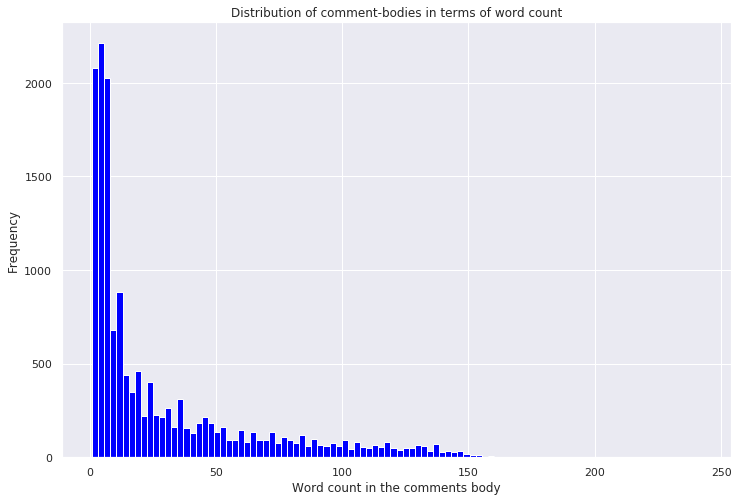

In [24]:
plt.figure(figsize=(12,8))
plt.hist(x=comments['word_count']
         ,bins=100
         ,color='blue'
        )
plt.title('Distribution of comment-bodies in terms of word count')
plt.xlabel('Word count in the comments body')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#filter comments with thank you 
#filter comments with <html>
#short thank you i.e length < 10 
#arrive at the long comments index which can be used for further analysis

In [ ]:
comments.head()

In [27]:
len(comments[comments['word_count'] <10]['comments_body'])

6669

In [ ]:
comments.shape[0]

In [28]:
14966 - 6669

8297

In [ ]:
comments['has_thank_index'] = comments['comments_body'].map(lambda x: 'thank' in x.lower() )

In [ ]:
comments.loc[:,['comments_body','has_thank_index','word_count']].head()

In [29]:
comments_body = comments['comments_body']

In [ ]:
comments_body[1]

In [30]:
has_thank_index = [  'thank' in str(a).lower()  for a in comments_body  ]

In [31]:
print('Number of comments with "thank": {}  '.format(sum(has_thank_index)))

Number of comments with "thank": 8759  


In [ ]:
comments.shape[0]

In [32]:
has_html_content = ['<html>' in str(a).lower() for a in comments_body]

In [33]:
type(has_html_content) 

list

In [35]:
sum(has_html_content)

34

In [37]:
print('Number of comments with html content: {} '.format(comments_body[has_html_content].count())) 
print('Number of comments with html content: {}'.format(sum(has_html_content)))

Number of comments with html content: 34 
Number of comments with html content: 34


In [38]:
#short thank you & length < 10 
short_thank_index = np.logical_and(has_thank_index, comments['word_count'] < 10 ) 

In [39]:
type(short_thank_index) 

pandas.core.series.Series

In [41]:
sum(short_thank_index) 

5284

In [42]:
print('Number of comments with a short thank you note: {}'.format(sum(short_thank_index)))

Number of comments with a short thank you note: 5284


In [43]:
comments_body[short_thank_index].head()

25           Thank you for the advice!
28           Thank you for the advice.
32           Thank you for the advice.
43    Awesome, thanks for the comment!
50                     Thank you Wanda
Name: comments_body, dtype: object

In [44]:
14966-5284

9682

In [45]:
comments_body[np.logical_not(short_thank_index)].head()

0    First, you speak to recruiters. They are train...
1    Most large universities offer study abroad pro...
2    First, I want to put you at ease that the oppo...
3    Your question submission was great! I just wan...
4    Thank you. I'm new to this site. I'm sorry if ...
Name: comments_body, dtype: object

In [ ]:
comments_body[4]

In [ ]:
print(os.listdir('../input/'))

In [46]:
tag_users = pd.read_csv('../input/tag_users.csv')

In [48]:
tag_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136663 entries, 0 to 136662
Data columns (total 2 columns):
tag_users_tag_id     136663 non-null int64
tag_users_user_id    136663 non-null object
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


In [49]:
tag_users.head()

,tag_users_tag_id,tag_users_user_id
0,593,c72ab38e073246e88da7e9a4ec7a4472
1,1642,8db519781ec24f2e8bdc67c2ac53f614
2,638,042d2184ee3e4e548fc3589baaa69caf
3,11093,c660bd0dc1b34224be78a58aa5a84a63
4,21539,8ce1dca4e94240239e4385ed22ef43ce


In [51]:
print(os.listdir('../input/'))

['professionals.csv', 'tag_users.csv', 'students.csv', 'tag_questions.csv', 'groups.csv', 'emails.csv', 'group_memberships.csv', 'answers.csv', 'comments.csv', 'matches.csv', 'tags.csv', 'questions.csv', 'school_memberships.csv']


In [52]:
tags = pd.read_csv('../input/tags.csv')

In [53]:
tags.head()

,tags_tag_id,tags_tag_name
0,27490,college
1,461,computer-science
2,593,computer-software
3,27292,business
4,18217,doctor


In [55]:
tags[tags.tags_tag_id == 11093]

,tags_tag_id,tags_tag_name
341,11093,life-coach


In [56]:
tag_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136663 entries, 0 to 136662
Data columns (total 2 columns):
tag_users_tag_id     136663 non-null int64
tag_users_user_id    136663 non-null object
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


In [60]:
tag_users_gb_user = tag_users.groupby(by='tag_users_user_id').count()

In [65]:
tag_users_gb_user['tag_users_tag_id'].head()

tag_users_user_id
00009a0f9bda43eba47104e9ac62aff5    3
000196ef8db54b9a86ae70ad31745d04    1
0008138be908438e8944b21f7f57f2c1    1
000d4635e5da41e3bfd83677ee11dda4    3
000e2b5714444d79a672bf927905135c    1
Name: tag_users_tag_id, dtype: int64

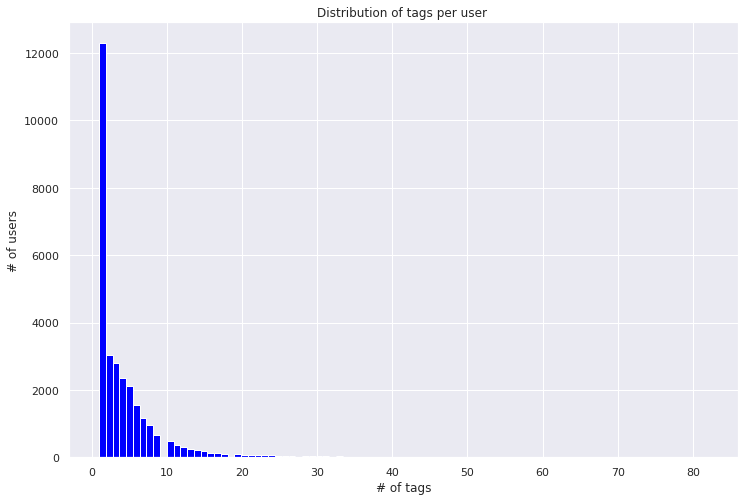

In [71]:
#distribution of tags per user 
tag_users_gb_user = tag_users.groupby(by='tag_users_user_id').count()
plt.figure(figsize=(12,8))
plt.hist(x = tag_users_gb_user['tag_users_tag_id'].values
         ,bins=90
         ,color='blue'
         ,histtype='bar'
        )
plt.title('Distribution of tags per user ')
plt.xlabel('# of tags')
plt.ylabel('# of users')
plt.show()

In [73]:
#most common tags
tag_users_tags = tag_users.merge(right=tags
                                  ,right_on='tags_tag_id'
                                  ,left_on='tag_users_tag_id'
                                  ,how='inner'
                                 )

In [75]:
tag_users_tags.shape[0]

136663

In [76]:
tag_users.shape[0]

136663

In [85]:
top_30_tags = tag_users_tags['tags_tag_name'].value_counts().sort_values(ascending=True).tail(30)

In [94]:
top_30_tags.head()

psychology     504
internships    504
medicine       510
design         511
education      515
Name: tags_tag_name, dtype: int64

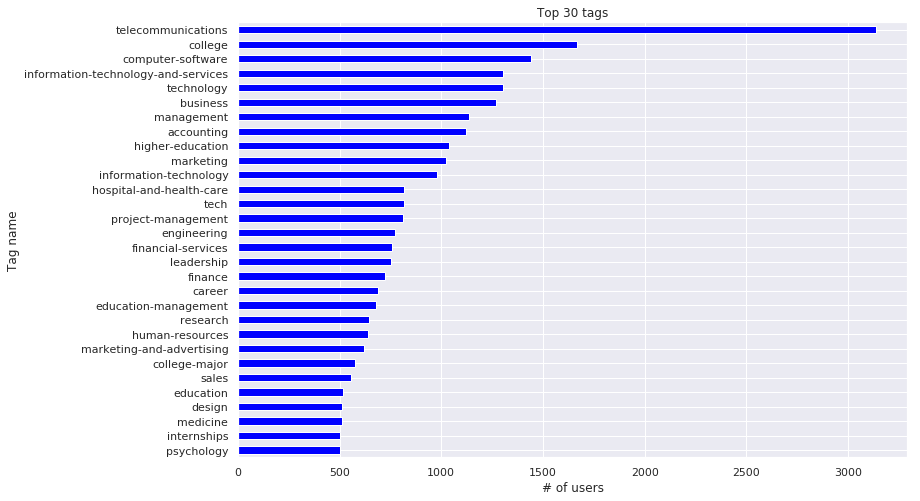

In [96]:
plt.figure(figsize=(12,8))
top_30_tags.plot(kind='barh'
                 ,color='blue'
                 )
plt.title('Top 30 tags')
plt.xlabel('# of users')
plt.ylabel('Tag name')
plt.show()

In [97]:
tag_users.head()

,tag_users_tag_id,tag_users_user_id
0,593,c72ab38e073246e88da7e9a4ec7a4472
1,1642,8db519781ec24f2e8bdc67c2ac53f614
2,638,042d2184ee3e4e548fc3589baaa69caf
3,11093,c660bd0dc1b34224be78a58aa5a84a63
4,21539,8ce1dca4e94240239e4385ed22ef43ce


In [102]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30971 entries, 0 to 30970
Data columns (total 3 columns):
students_id             30971 non-null object
students_location       28938 non-null object
students_date_joined    30971 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 726.0+ KB


In [99]:
tag_users['is_professional'] = tag_users['tag_users_user_id'].isin(list(professionals['professionals_id']))

In [100]:
tag_users.head()

,tag_users_tag_id,tag_users_user_id,is_professional
0,593,c72ab38e073246e88da7e9a4ec7a4472,True
1,1642,8db519781ec24f2e8bdc67c2ac53f614,True
2,638,042d2184ee3e4e548fc3589baaa69caf,True
3,11093,c660bd0dc1b34224be78a58aa5a84a63,True
4,21539,8ce1dca4e94240239e4385ed22ef43ce,True


In [101]:
professionals[professionals.professionals_id == 'c72ab38e073246e88da7e9a4ec7a4472']

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
785,c72ab38e073246e88da7e9a4ec7a4472,"Tempe, Arizona",Computer Software,Software Engineer at LinkedIn,2014-02-13 22:30:36


In [103]:
tag_users['is_student'] = tag_users['tag_users_user_id'].isin(list(students['students_id']))

In [104]:
tag_users[tag_users.is_student == True].head()

,tag_users_tag_id,tag_users_user_id,is_professional,is_student
10,8593,82cc74c0e18347e4b68b219e250eb10f,False,True
11,11460,d68c9bc7d1a841dc95164ced387275e0,False,True
28,30067,c734f2d3fdc4446393a096b3a1b7be62,False,True
42,89,f38238fbe6c8436796bc8218e83880de,False,True
48,89,2c4d7814a806431ab1161d77c0243b23,False,True


In [108]:
students[students.students_id == '82cc74c0e18347e4b68b219e250eb10f']

,students_id,students_location,students_date_joined
11728,82cc74c0e18347e4b68b219e250eb10f,"Hemet, California",2016-05-28 03:00:23


In [112]:
tag_users['is_other'] = np.logical_not(np.logical_or(tag_users['is_professional'],tag_users['is_student']))

In [113]:
tag_users['is_other'].sum()

0

In [115]:
tag_users.drop(labels=['is_other'],inplace=True,axis=1)

In [116]:
tag_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136663 entries, 0 to 136662
Data columns (total 4 columns):
tag_users_tag_id     136663 non-null int64
tag_users_user_id    136663 non-null object
is_professional      136663 non-null bool
is_student           136663 non-null bool
dtypes: bool(2), int64(1), object(1)
memory usage: 2.3+ MB


In [143]:
#tag_users.tag_users_user_id.nunique()
#tag_users[tag_users['is_professional'] == True]['tag_users_user_id'].nunique()
tag_users[tag_users['is_student'] == True ]['tag_users_user_id'].nunique()

4608

In [144]:
print('Of the {} tagged users, {} are professionals and {} are students'.format(tag_users.tag_users_user_id.nunique()
                                                                               ,tag_users[tag_users['is_professional'] == True]['tag_users_user_id'].nunique()
                                                                               ,tag_users[tag_users['is_student'] == True ]['tag_users_user_id'].nunique())
     )

Of the 30202 tagged users, 25594 are professionals and 4608 are students


In [147]:
#tag_users.shape[0]
#tag_users['is_professional'].sum()
tag_users['is_student'].sum()

19205

In [148]:
print('Of the total {} tags, {} have been given to students and {} to professionals '.format(tag_users.shape[0]
                                                                                            ,tag_users['is_student'].sum()
                                                                                            ,tag_users['is_professional'].sum())
     )

Of the total 136663 tags, 19205 have been given to students and 117458 to professionals 


In [153]:
#top 30 tags for students 
tag_users_tags = tag_users.merge(right=tags
                                  ,left_on='tag_users_tag_id'
                                  ,right_on='tags_tag_id'
                                  ,how='inner'
                                 )
                                  

In [159]:
top_20_student_tags = tag_users_tags[tag_users_tags.is_student == True ]['tags_tag_name'].value_counts(ascending=True).tail(20)

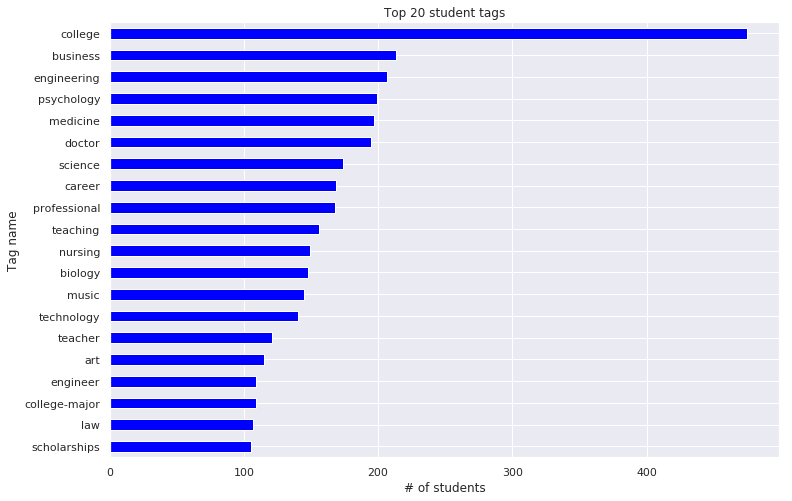

In [160]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
top_20_student_tags.plot(kind='barh'
                         ,color='blue'
                        )
plt.xlabel('# of students')
plt.ylabel('Tag name')
plt.title('Top 20 student tags')
plt.show()

In [161]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [168]:
init_notebook_mode(connected=True)

In [170]:
top_20_student_tags

scholarships     105
law              107
college-major    109
engineer         109
art              115
teacher          121
technology       140
music            145
biology          148
nursing          149
teaching         156
professional     168
career           169
science          174
doctor           195
medicine         197
psychology       199
engineering      207
business         213
college          475
Name: tags_tag_name, dtype: int64

In [167]:
list(top_20_student_tags.index)

['scholarships',
 'law',
 'college-major',
 'engineer',
 'art',
 'teacher',
 'technology',
 'music',
 'biology',
 'nursing',
 'teaching',
 'professional',
 'career',
 'science',
 'doctor',
 'medicine',
 'psychology',
 'engineering',
 'business',
 'college']

In [169]:
data = [go.Pie(values=top_20_student_tags.values
               ,labels=list(top_20_student_tags.index)
              )
       ]
layout=dict(
    width=1000
    ,height=800
    ,title='Top 20 student tags'
    ,xaxis=dict(
        title='# Users'
    )
    ,yaxis=go.layout.YAxis(
        automargin=True
        ,titlefont=dict(size=30)
        ,tickfont=dict(size=12)
    )
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)